# Problem statement

Bank campaign dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, preprocessing, metrics, pipeline, tree

from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

%matplotlib inline

In [3]:
df = pd.read_csv("/data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


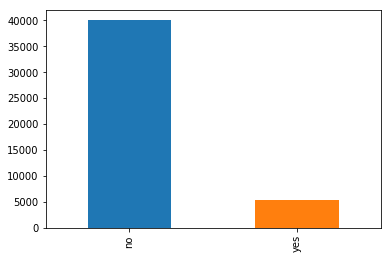

In [4]:
df.y.value_counts().plot.bar()

In [5]:
df.y.value_counts()/len(df.y)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [9]:
y = np.where(df.y == "yes", 1, 0)
X = pd.get_dummies(df.iloc[:, :-1])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1) 

In [10]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.881885
1    0.118115
dtype: float64

In [11]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))

Accuracy 0.9007667354762607


In [45]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))

Accuracy 0.9019463285166618


In [32]:
est = pipe.steps[-1][1]

In [33]:
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = X.columns)

In [35]:
!dot -Tpng tree.dot -o tree.png

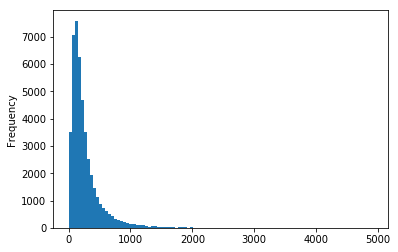

In [37]:
df.duration.plot.hist(bins = 100)

In [38]:
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [41]:
pd.DataFrame({"feture": X.columns, "importance": est.feature_importances_}).sort_values("importance", ascending = False)

,feture,importance
3,duration,0.606017
49,poutcome_success,0.336646
0,age,0.051436
32,contact_cellular,0.005901
38,month_feb,0.000000
28,housing_no,0.000000
29,housing_yes,0.000000
30,loan_no,0.000000
31,loan_yes,0.000000
33,contact_telephone,0.000000
